---
## CSVファイル読み込み DataFrameに保存

In [1]:
import pandas as pd

csv_encoding = 'Shift_JISx0213'
inputFile = ".\\Data\\05-2_ClassfiedList_raw.csv"
df = pd.read_csv(inputFile,index_col=False, encoding=csv_encoding)
display(df.head(5))
display(df.dtypes)
display(df.shape)

,SCC,SC,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
0,110001,kcEulVbIMR,104,1.0,1.0,NaN,1.0,NaN
1,110002,ddNCOudyRd,95,2.0,2.0,NaN,NaN,NaN
2,110003,bUofrguzUk,103,8.0,5.0,4.0,15.0,1.0
3,110004,nkHNuWKcvx,104,13.0,2.0,4.0,13.0,NaN
4,120001,xRGeDSlKHv,40,7.0,4.0,NaN,26.0,1.0


SCC         int64
SC         object
Total       int64
Pro1-1    float64
Pro1-2    float64
Pro1-3    float64
Pro2      float64
Pro3      float64
dtype: object

(9995, 8)

---
## DataFrameの値を調整
SC列を削除し、NaNを0に置き換える。

In [2]:
df = df[['SCC','Total', 'Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].fillna(0)
display(df.head(5))

,SCC,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
0,110001,104,1.0,1.0,0.0,1.0,0.0
1,110002,95,2.0,2.0,0.0,0.0,0.0
2,110003,103,8.0,5.0,4.0,15.0,1.0
3,110004,104,13.0,2.0,4.0,13.0,0.0
4,120001,40,7.0,4.0,0.0,26.0,1.0


In [3]:
df = df.set_index('SCC')
display(df.head(5))
display(df.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
110001,104,1.0,1.0,0.0,1.0,0.0
110002,95,2.0,2.0,0.0,0.0,0.0
110003,103,8.0,5.0,4.0,15.0,1.0
110004,104,13.0,2.0,4.0,13.0,0.0
120001,40,7.0,4.0,0.0,26.0,1.0


(9995, 6)

---
## Totalが10以上のレコードのうち、Pro1～Pro3のTotalに対する割合が大きい(30%以上)レコードを抽出する

Totalが10以上のレコードを残す。10未満を削除。  
レコード数が変わるので、deepcopyをして新しいDataFrameを生成しておく。

In [4]:
import copy
df_rate = pd.DataFrame()
df_rate = copy.deepcopy(df[df['Total'] >= 10])
display(df_rate.head(5))
display(df_rate.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
110001,104,1.0,1.0,0.0,1.0,0.0
110002,95,2.0,2.0,0.0,0.0,0.0
110003,103,8.0,5.0,4.0,15.0,1.0
110004,104,13.0,2.0,4.0,13.0,0.0
120001,40,7.0,4.0,0.0,26.0,1.0


(9174, 6)

Pro1～Pro3の値をTotalで割り、割合をパーセントで求める

In [5]:
df_rate[['Pro1-1']] = round(df_rate['Pro1-1'] / df_rate['Total'] * 100, 0)
df_rate['Pro1-2'] = round(df_rate['Pro1-2'] / df_rate['Total'] * 100, 0)
df_rate['Pro1-3'] = round(df_rate['Pro1-3'] / df_rate['Total'] * 100, 0)
df_rate['Pro2'] = round(df_rate['Pro2'] / df_rate['Total'] * 100, 0)
df_rate['Pro3'] = round(df_rate['Pro3'] / df_rate['Total'] * 100, 0)
df_rate = df_rate.astype('int64')
display(df_rate.head(5))
display(df_rate.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
110001,104,1,1,0,1,0
110002,95,2,2,0,0,0
110003,103,8,5,4,15,1
110004,104,12,2,4,12,0
120001,40,18,10,0,65,2


(9174, 6)

Pro1～Pro3の値に一つでも30以上があればその行を抽出する。:その①
  - それぞれの列に条件を与えて、条件に合うものを抽出する。

In [6]:
df_rate2 = df_rate[(df_rate['Pro1-1'] >= 30) | (df_rate['Pro1-2'] >= 30) | (df_rate['Pro1-3'] >= 30) | 
                   (df_rate['Pro2'] >= 30) | (df_rate['Pro3'] >= 30)]
display(df_rate2.head(5))
display(df_rate2.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
120001,40,18,10,0,65,2
120008,41,7,2,7,32,0
120009,12,17,0,0,33,0
120018,78,6,8,26,50,3
120019,124,15,13,16,42,8


(1639, 6)

Pro1～Pro3の値に一つでも30以上があればその行を抽出する。:その②
  - Pro1～Pro3の要素全体に**30未満じゃない**かどうかの条件を適用し、全ての要素が**30未満**の行を削除。

In [7]:
df_rate3 = df_rate[~(df_rate[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']] < 30)].dropna(how='all')
display(df_rate3.head(5))

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
120001,NaN,NaN,NaN,NaN,65.0,NaN
120008,NaN,NaN,NaN,NaN,32.0,NaN
120009,NaN,NaN,NaN,NaN,33.0,NaN
120018,NaN,NaN,NaN,NaN,50.0,NaN
120019,NaN,NaN,NaN,NaN,42.0,NaN


  - index、列名を頼りに、元のデータで上書きする。
  - floatをintに変換する。

In [8]:
df_rate3.update(df_rate)
df_rate3 = df_rate3.astype('int64')
display(df_rate3.head(5))
display(df_rate3.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
120001,40,18,10,0,65,2
120008,41,7,2,7,32,0
120009,12,17,0,0,33,0
120018,78,6,8,26,50,3
120019,124,15,13,16,42,8


(1639, 6)

---
## レコードとにPro1~Pro3の合計、平均、分散、標準偏差を求める。

統計量計算
  - 合計
  - 平均
  - 標準偏差
  - 分散

In [9]:
df2 = pd.DataFrame()
df2['Total'] = df_rate3['Total']
df2['Sum'] = df_rate3[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].sum(axis=1)
df2['Mean'] = df_rate3[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].mean(axis=1)
df2['Std'] = df_rate3[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].std(axis=1)
df2['Var'] = df_rate3[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].var(axis=1)
display(df2.head(5))
display(df2.shape)

,Total,Sum,Mean,Std,Var
SCC,,,,,
120001,40,95,19.0,26.683328,712.0
120008,41,48,9.6,12.895736,166.3
120009,12,50,10.0,14.815532,219.5
120018,78,93,18.6,19.718012,388.8
120019,124,94,18.8,13.330416,177.7


(1639, 5)

In [10]:
#df2.to_csv(".\\Data\\05-2_ClassfiedList_Sta.csv")

---
## 散布図等 描画

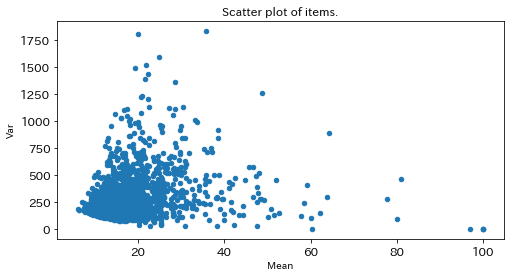

In [12]:
import numpy
df2.plot(kind='scatter', x='Mean', y='Var',  title = "Scatter plot of items.", figsize=(8, 4), fontsize=12)